In [174]:
import pandas as pd

dateparse = lambda x:pd.datetime.strptime(x,'%Y-%m')

data = pd.read_csv('./airpassengers.csv',parse_dates=['month'],date_parser=dateparse)
data.set_index("month")
print(data.head())

       month  passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121


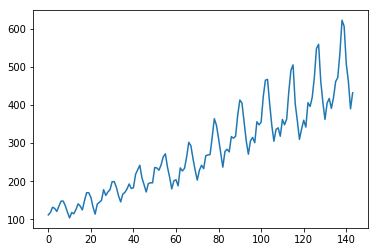

In [175]:
#plot the data
import matplotlib.pylab as plt
%matplotlib inline
plt.plot(data["passengers"])

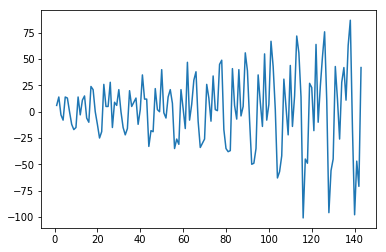

In [176]:
data["diff1_passen"] = data["passengers"].diff()
plt.plot(data["diff1_passen"])

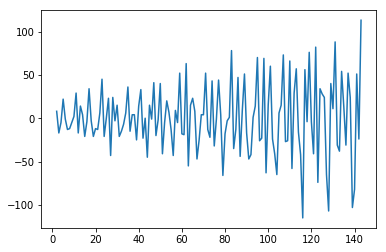

In [177]:
data["diff2_passen"] = data["diff1_passen"].diff()
plt.plot(data["diff2_passen"])

In [178]:
#https://blog.csdn.net/qingqingdianshui/article/details/79662616
#将数据分解为趋势序列，季节序列和残差序列
import numpy as np
ts_log = np.log(data['passengers'])
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log,freq=12)
trend = decomposition.trend #趋势
seasonal = decomposition.seasonal  #季节性
residual = decomposition.resid     #残差序列
residual.dropna(inplace=True)

In [179]:
import statsmodels.tsa.stattools as ts
dftest = ts.adfuller(residual)
dfoutput = pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Obserfvisions Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)


Test Statistic                 -6.332387e+00
p-value                         2.885059e-08
#Lags Used                      9.000000e+00
Number of Obserfvisions Used    1.220000e+02
Critical Value (1%)            -3.485122e+00
Critical Value (5%)            -2.885538e+00
Critical Value (10%)           -2.579569e+00
dtype: float64


In [180]:
#residual
print(data.columns)
#drop columns not needed
newDates = data.drop(['passengers', 'diff1_passen'], axis=1) 
#newDates

#newDates.index = pd.date_range(start='1949-03-01', end='1961-01-01', freq='M', ) 
#newDates

newDates.columns = ['time', 'data'] 
newDates.dropna(inplace=True) 
newDates.index = pd.date_range(start='1949-03-01', end='1961-01-01', freq='M', ) 

y = newDates.data 
y

Index(['month', 'passengers', 'diff1_passen', 'diff2_passen'], dtype='object')


1949-03-31      8.0
1949-04-30    -17.0
1949-05-31     -5.0
1949-06-30     22.0
1949-07-31     -1.0
1949-08-31    -13.0
1949-09-30    -12.0
1949-10-31     -5.0
1949-11-30      2.0
1949-12-31     29.0
1950-01-31    -17.0
1950-02-28     14.0
1950-03-31      4.0
1950-04-30    -21.0
1950-05-31     -4.0
1950-06-30     34.0
1950-07-31     -3.0
1950-08-31    -21.0
1950-09-30    -12.0
1950-10-31    -13.0
1950-11-30      6.0
1950-12-31     45.0
1951-01-31    -21.0
1951-02-28      0.0
1951-03-31     23.0
1951-04-30    -43.0
1951-05-31     24.0
1951-06-30     -3.0
1951-07-31     15.0
1951-08-31    -21.0
              ...  
1958-07-31    -16.0
1958-08-31    -42.0
1958-09-30   -115.0
1958-10-31     56.0
1958-11-30     -4.0
1958-12-31     76.0
1959-01-31     -4.0
1959-02-28    -41.0
1959-03-31     82.0
1959-04-30    -74.0
1959-05-31     34.0
1959-06-30     28.0
1959-07-31     24.0
1959-08-31    -65.0
1959-09-30   -107.0
1959-10-31     40.0
1959-11-30     11.0
1959-12-31     88.0
1960-01-31    -31.0


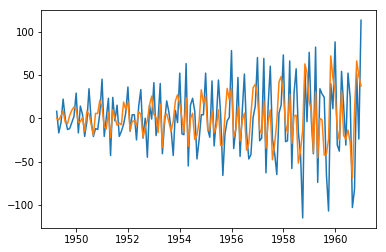

In [181]:
#看到p-value是个远小于0.05的值，可以认为此序列是稳定的
from statsmodels.tsa.arima_model import ARIMA
model_ARIMA = ARIMA(y,(2,0,2)).fit()
predictions_ARIMA = model_ARIMA.predict(start='1949-03-31',end='1960-12-31')
plt.plot(y)
plt.plot(predictions_ARIMA)

In [182]:
start=pd.to_datetime('1960-12')